In [1]:
import networkx as nx

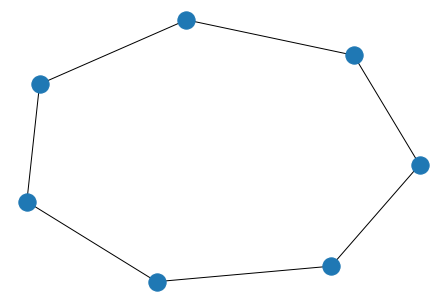

In [2]:
# Create a graph and visualize it
G = nx.cycle_graph(7)

import matplotlib.pyplot as plt
nx.draw(G)

In [3]:
import gurobipy as gp
from gurobipy import GRB

In [4]:
# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars( G.edges, vtype=GRB.BINARY )

# Objective function: maximize number of edges
m.setObjective( gp.quicksum( x[e] for e in G.edges ), GRB.MAXIMIZE )

# Add constraint for each node
m.addConstrs( gp.quicksum( x[e] for e in G.edges if e in G.edges(i)  ) <= 1 for i in G.nodes )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 7 rows, 7 columns and 14 nonzeros
Model fingerprint: 0xec7b7c59
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve time: 0.01s
Presolved: 7 rows, 7 columns, 14 nonzeros
Variable types: 0 continuous, 7 integer (7 binary)

Root relaxation: cutoff, 3 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0         3.00000    3.00000  0.00%     -    0s

Explored 0 nodes 

In [5]:
print("Objective:",m.objVal)

selected_edges = [ e for e in G.edges if x[e].x > 0.5 ]

Objective: 3.0


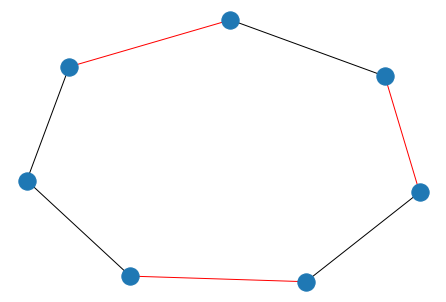

In [6]:
# Visualize the solution
edge_colors = [ "red" if i in selected_edges else "black" for i in G.edges ]

nx.draw( G, edge_color=edge_colors )